 Here WE have ran all the commands as mentioned 

In [2]:
library(ggplot2)
#install.packages("ez",repos="http://cran.us.r-project.org")
library(ez)

In [3]:
rm(list=ls())
.First <- function() {
  options(width=70)
  options(useFancyQuotes=FALSE)
  require(ascii)
  require(xtable)
  require(ggplot2)
  require(scales)
  require(reshape2)
  require(plyr)
  theme_set(theme_bw())
  png <<- function(res=96, width=500, height=300, ...) grDevices::png(res=res, width=width, height=height, ...)
}

In [4]:

housing <- read.csv("C://Users//Fnu//Downloads//Rgraphics//dataSets/landdata-states.csv")
head(housing[1:5])

State,region,Date,Home.Value,Structure.Cost
AK,West,2010.25,224952,160599
AK,West,2010.50,225511,160252
AK,West,2009.75,225820,163791
AK,West,2010.00,224994,161787
AK,West,2008.00,234590,155400
AK,West,2008.25,233714,157458


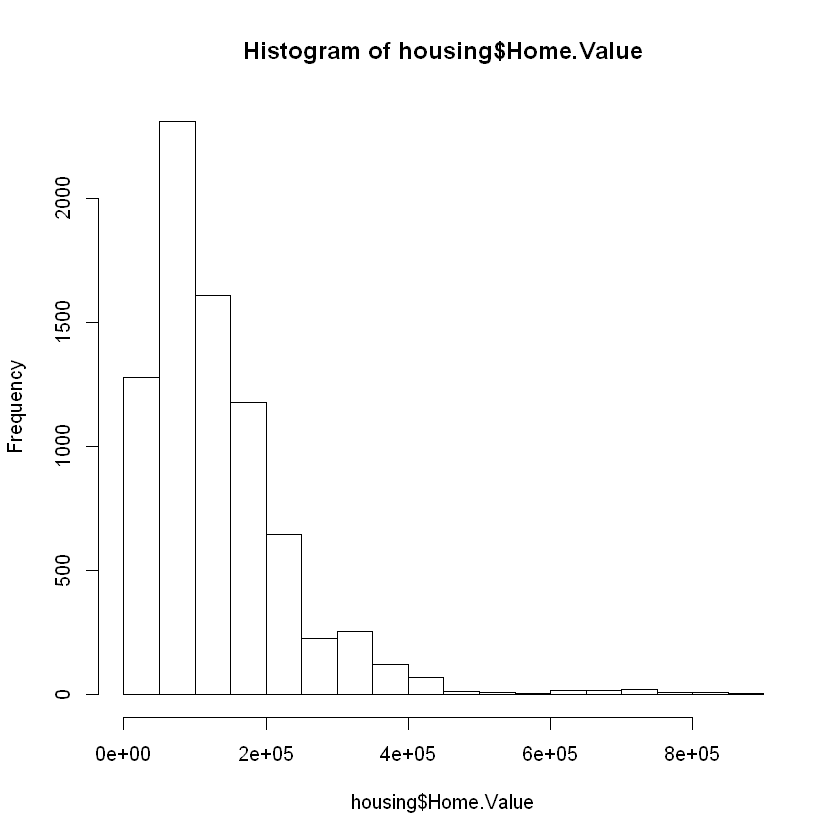

In [5]:
hist(housing$Home.Value)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


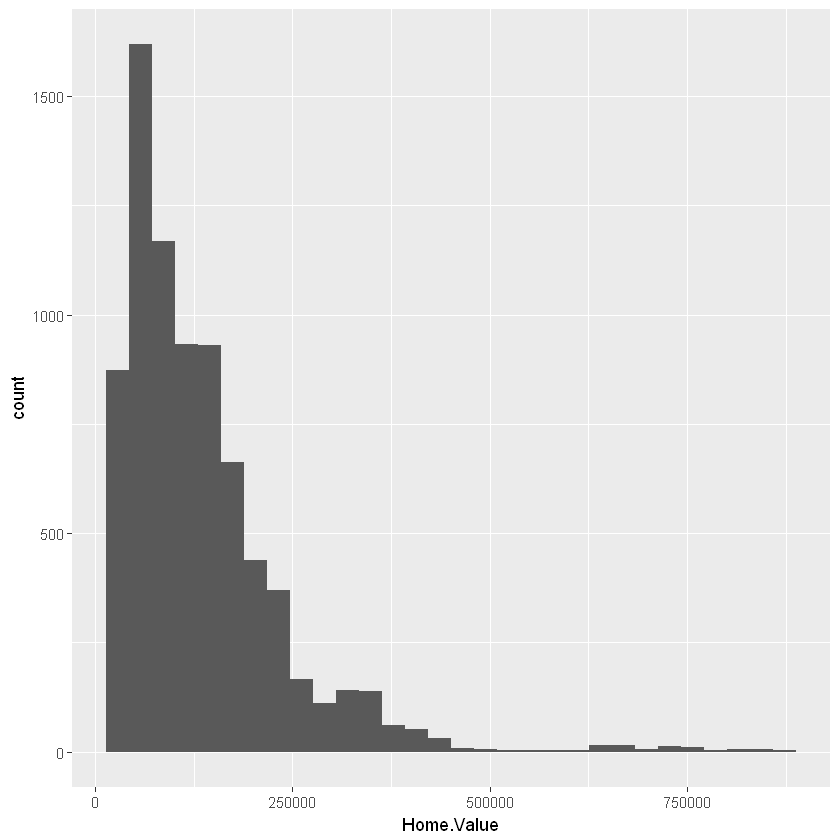

In [6]:
library(ggplot2)
ggplot(housing, aes(x = Home.Value)) +
  geom_histogram()

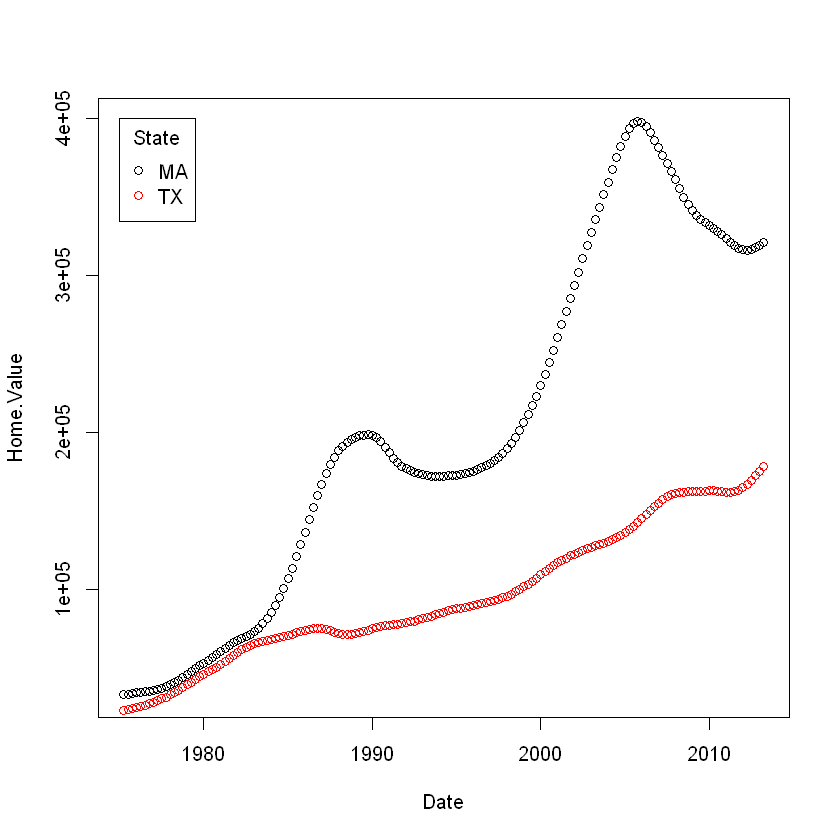

In [7]:
plot(Home.Value ~ Date,
     data=subset(housing, State == "MA"))
points(Home.Value ~ Date, col="red",
       data=subset(housing, State == "TX"))
legend(1975, 400000,
       c("MA", "TX"), title="State",
       col=c("black", "red"),
       pch=c(1, 1))

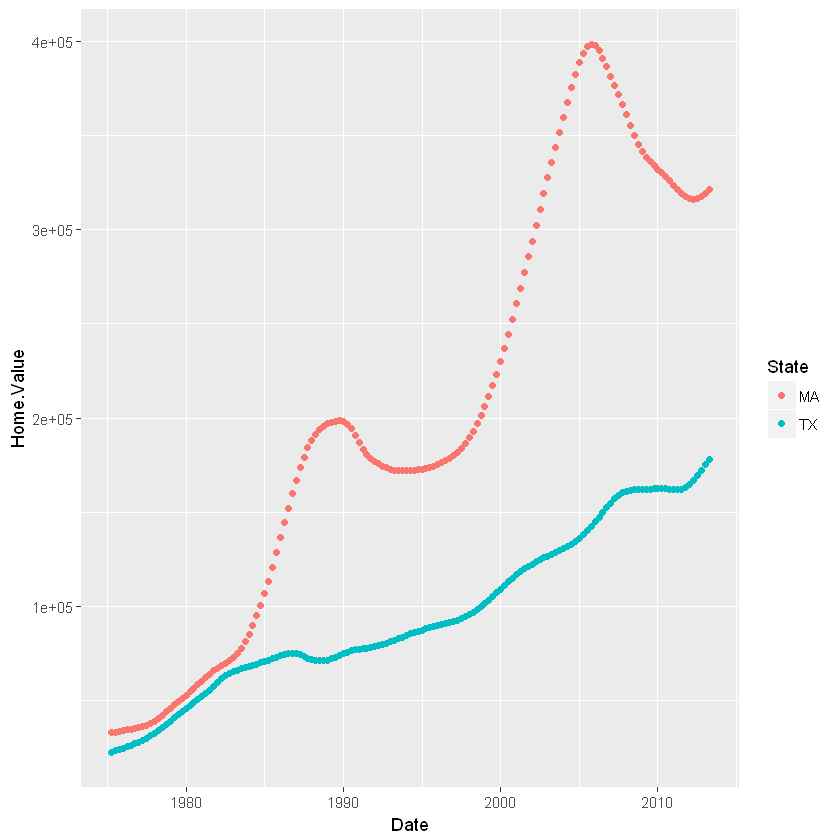

In [8]:
ggplot(subset(housing, State %in% c("MA", "TX")),
       aes(x=Date,
           y=Home.Value,
           color=State))+
  geom_point()

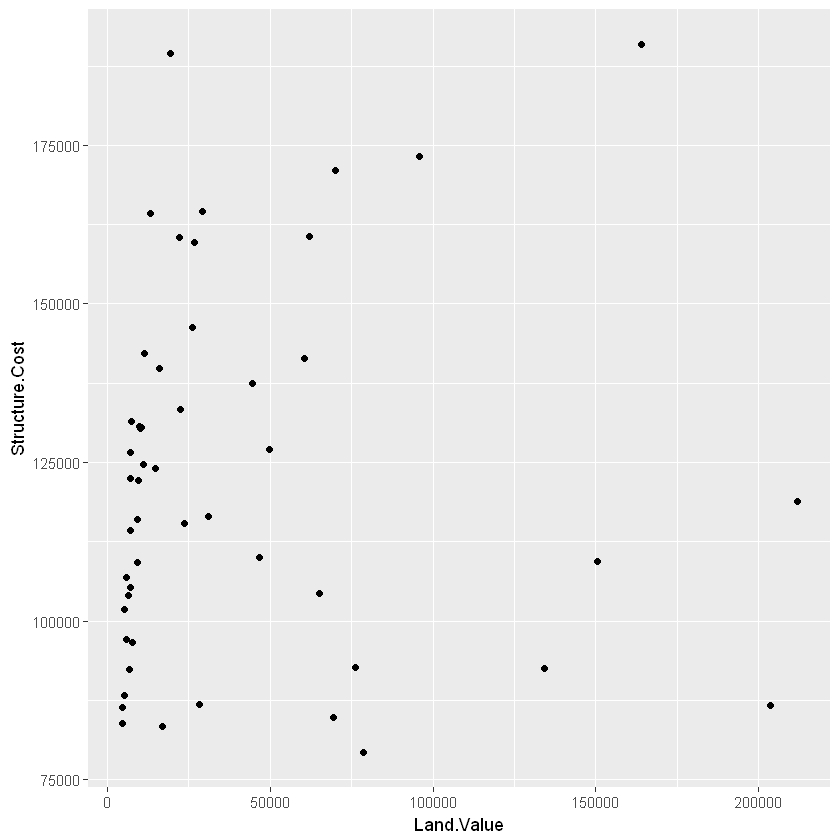

In [9]:
hp2001Q1 <- subset(housing, Date == 2001.25) 
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = Land.Value)) +
  geom_point()

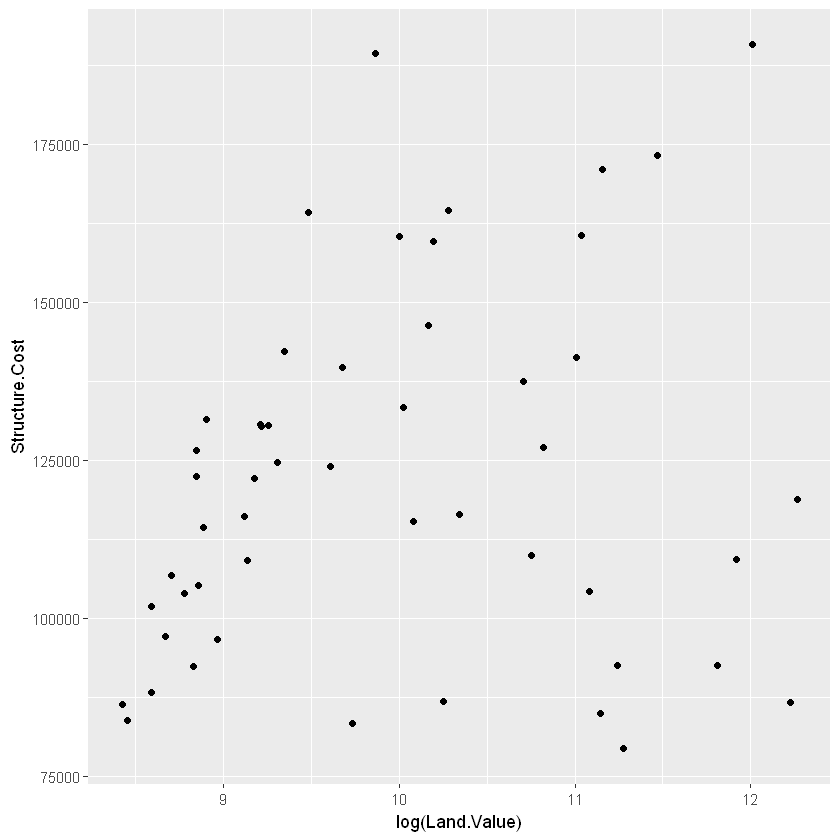

In [10]:
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = log(Land.Value))) +
  geom_point()

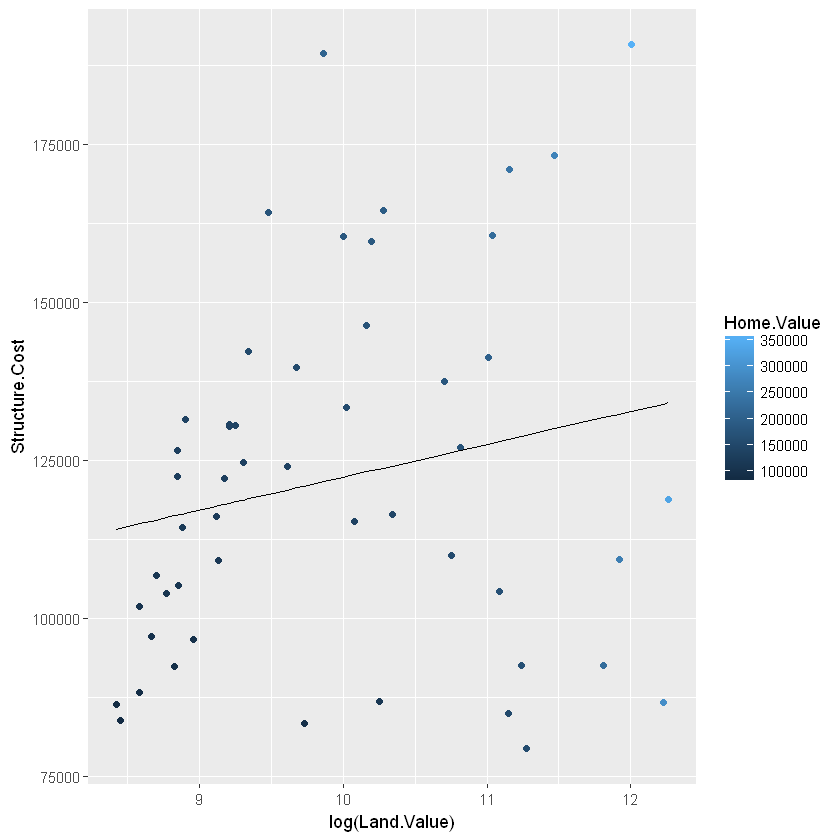

In [11]:
hp2001Q1$pred.SC <- predict(lm(Structure.Cost ~ log(Land.Value), data = hp2001Q1))

p1 <- ggplot(hp2001Q1, aes(x = log(Land.Value), y = Structure.Cost))

p1 + geom_point(aes(color = Home.Value)) +
  geom_line(aes(y = pred.SC))

`geom_smooth()` using method = 'loess'


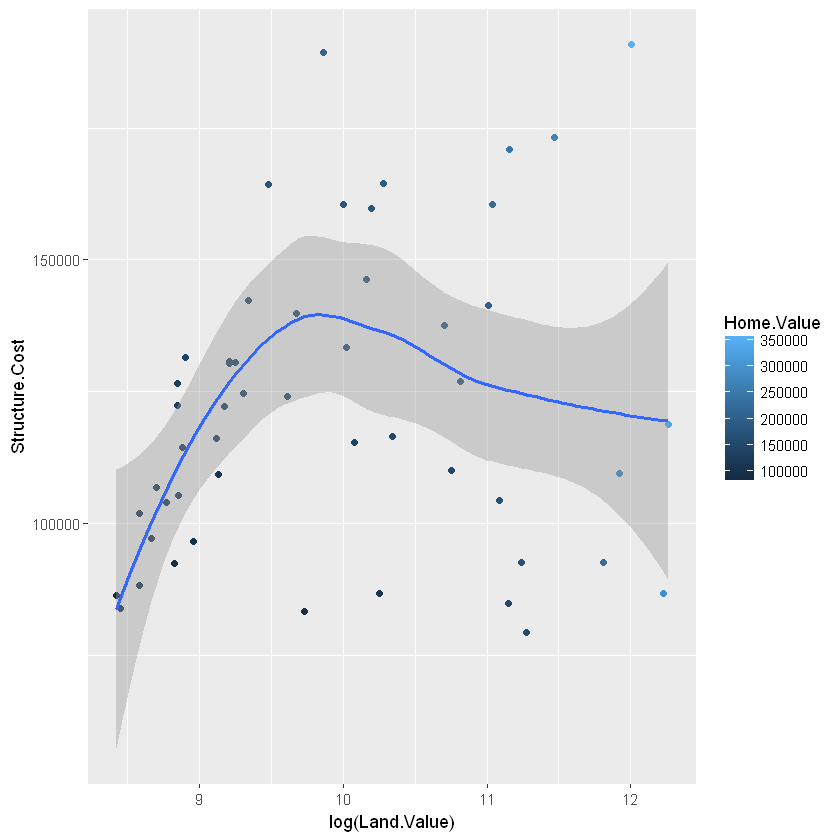

In [12]:
p1 +
  geom_point(aes(color = Home.Value)) +
  geom_smooth()

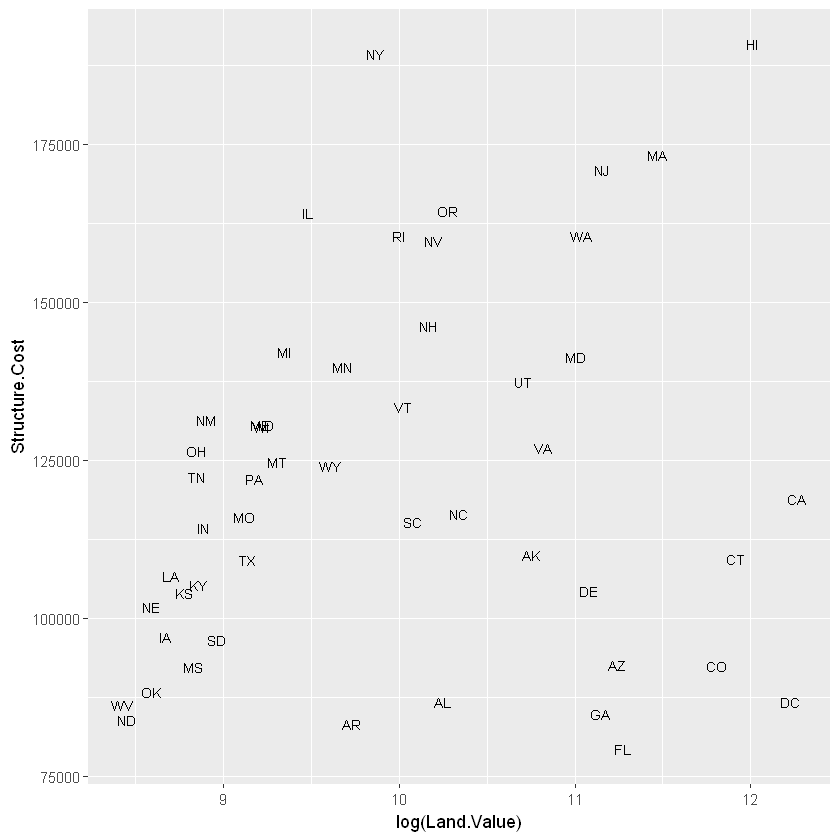

In [13]:
p1 + 
  geom_text(aes(label=State), size = 3)

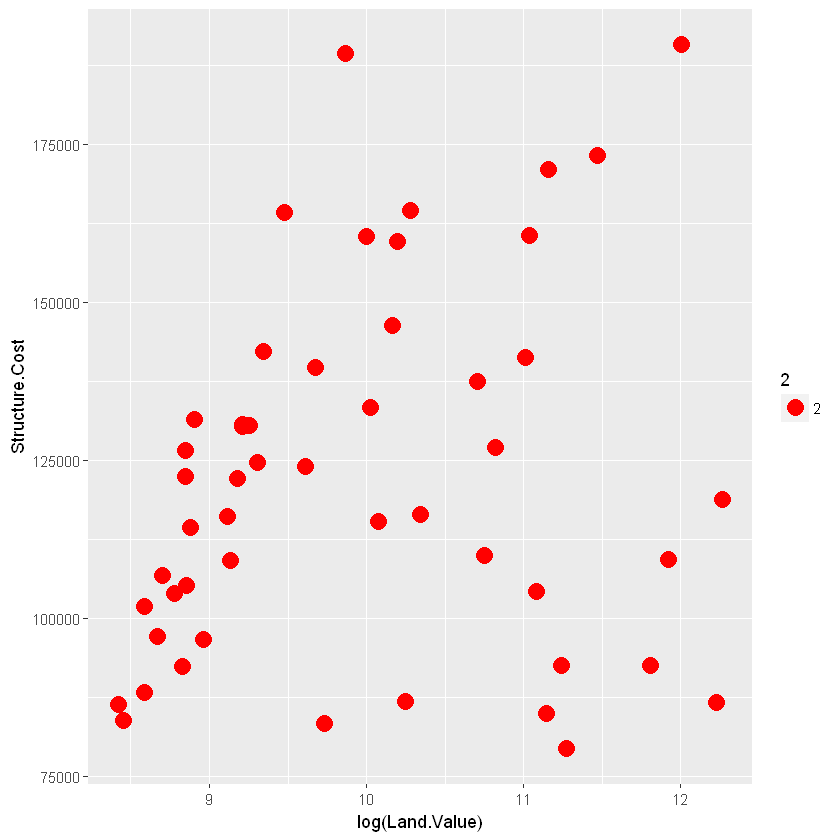

In [18]:
p1 +
  geom_point(aes(size = 2),# incorrect! 2 is not a variable
             color="red") # this is fine -- all points red

Warning message:
"Removed 1 rows containing missing values (geom_point)."

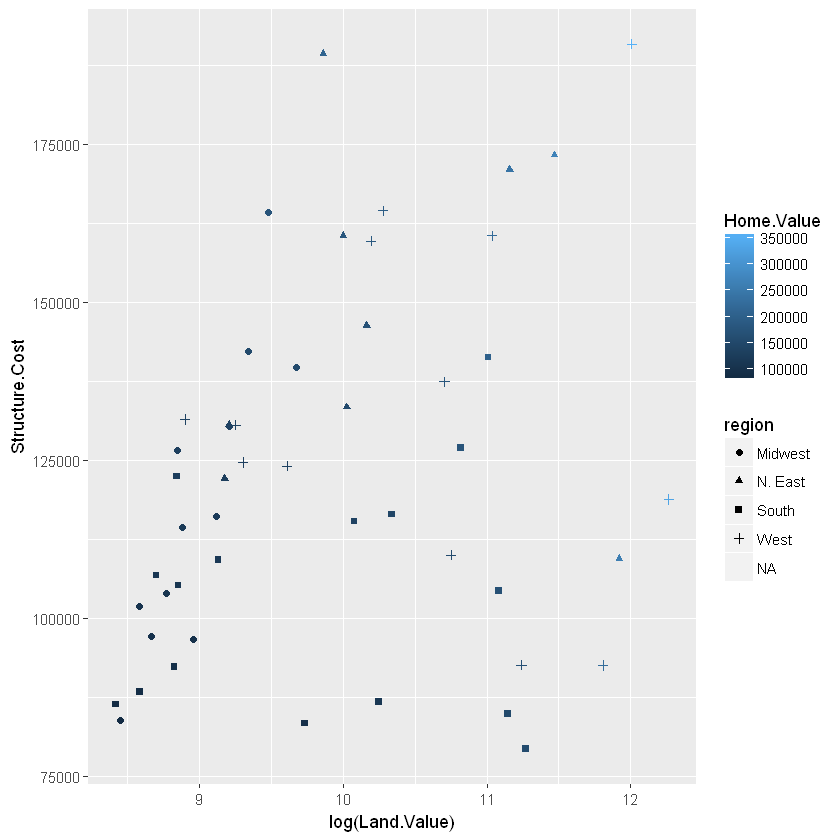

In [19]:
p1 +
  geom_point(aes(color=Home.Value, shape = region))

X,Country,HDI.Rank,HDI,CPI,Region
1,Afghanistan,172,0.398,1.5,Asia Pacific
2,Albania,70,0.739,3.1,East EU Cemt Asia
3,Algeria,96,0.698,2.9,MENA
4,Angola,148,0.486,2.0,SSA
5,Argentina,45,0.797,3.0,Americas
6,Armenia,86,0.716,2.6,East EU Cemt Asia


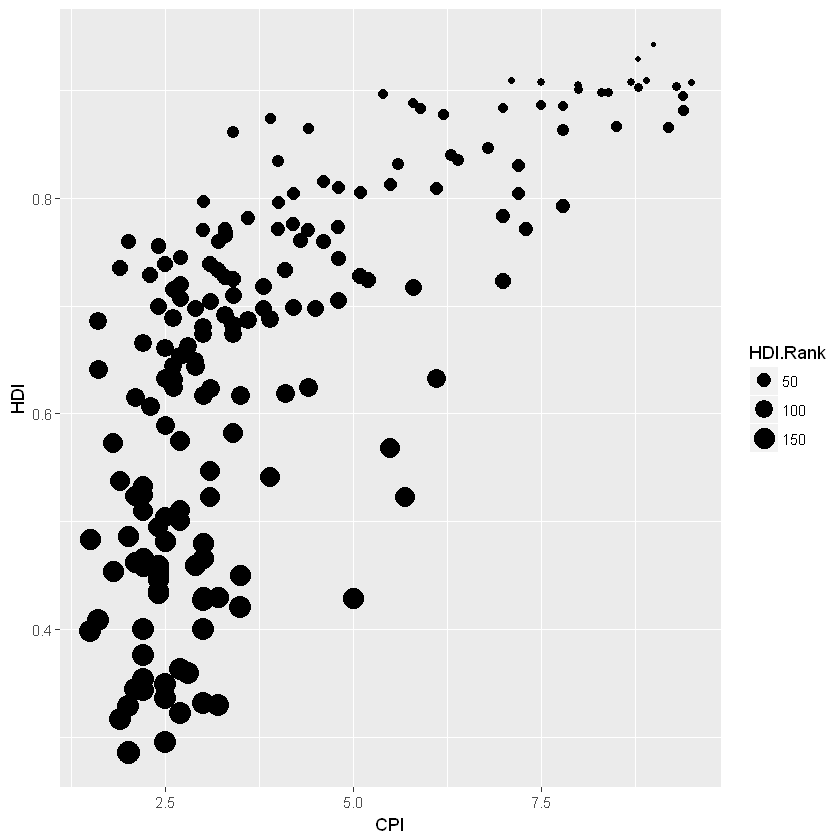

In [20]:
dat <- read.csv("C://Users//Fnu//Downloads//Rgraphics//dataSets/EconomistData.csv")
head(dat)

ggplot(dat, aes(x = CPI, y = HDI, size = HDI.Rank)) + geom_point()

In [21]:
args(geom_histogram)
args(stat_bin)

function (mapping = NULL, data = NULL, stat = "bin", position = "stack", 
    ..., binwidth = NULL, bins = NULL, na.rm = FALSE, show.legend = NA, 
    inherit.aes = TRUE) 
NULL

function (mapping = NULL, data = NULL, geom = "bar", position = "stack", 
    ..., binwidth = NULL, bins = NULL, center = NULL, boundary = NULL, 
    breaks = NULL, closed = c("right", "left"), pad = FALSE, 
    na.rm = FALSE, show.legend = NA, inherit.aes = TRUE) 
NULL

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


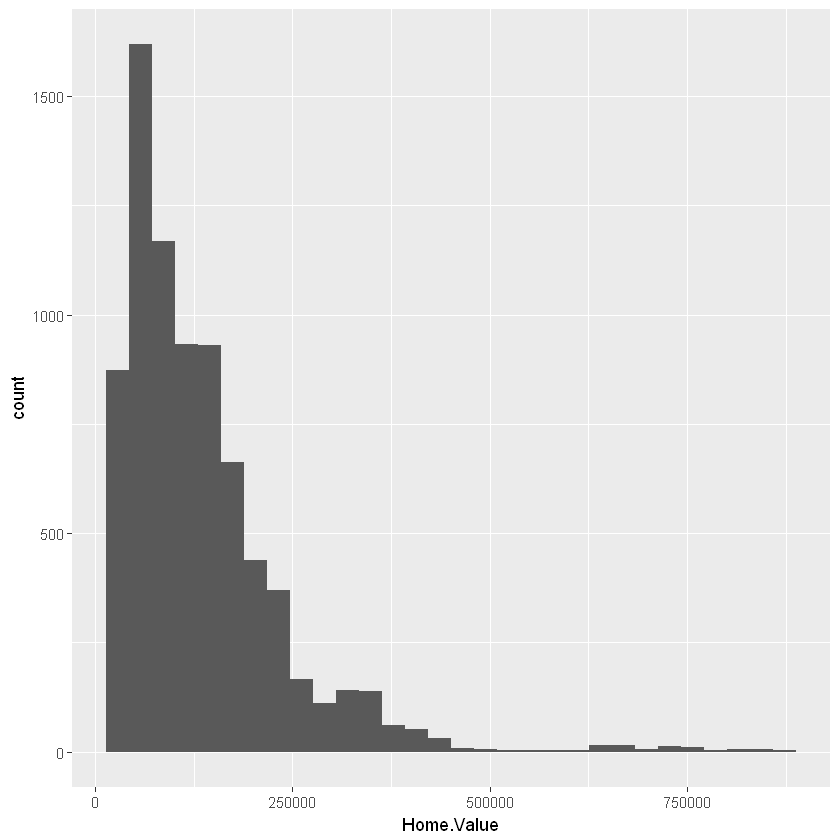

In [22]:
p2 <- ggplot(housing, aes(x = Home.Value))
p2 + geom_histogram()

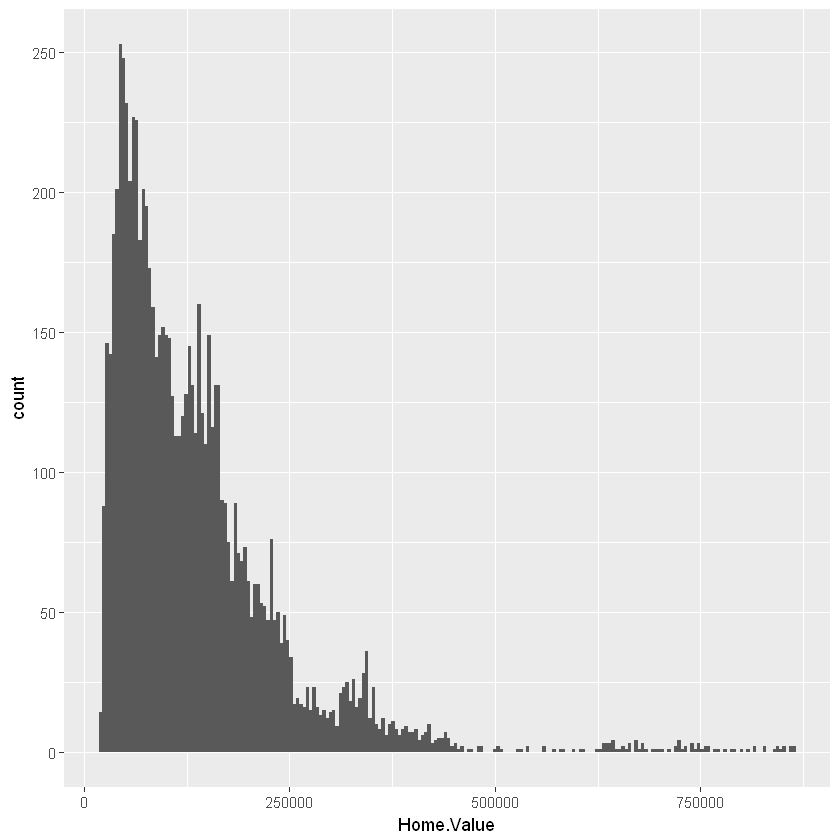

In [23]:
p2 + geom_histogram(stat = "bin", binwidth=4000)

In [24]:
housing.sum <- aggregate(housing["Home.Value"], housing["State"], FUN=mean)
rbind(head(housing.sum), tail(housing.sum))

,State,Home.Value
1,AK,147385.14
2,AL,92545.22
3,AR,82076.84
4,AZ,140755.59
5,CA,282808.08
6,CO,158175.99
46,VA,155391.44
47,VT,132394.60
48,WA,178522.58
49,WI,108359.45


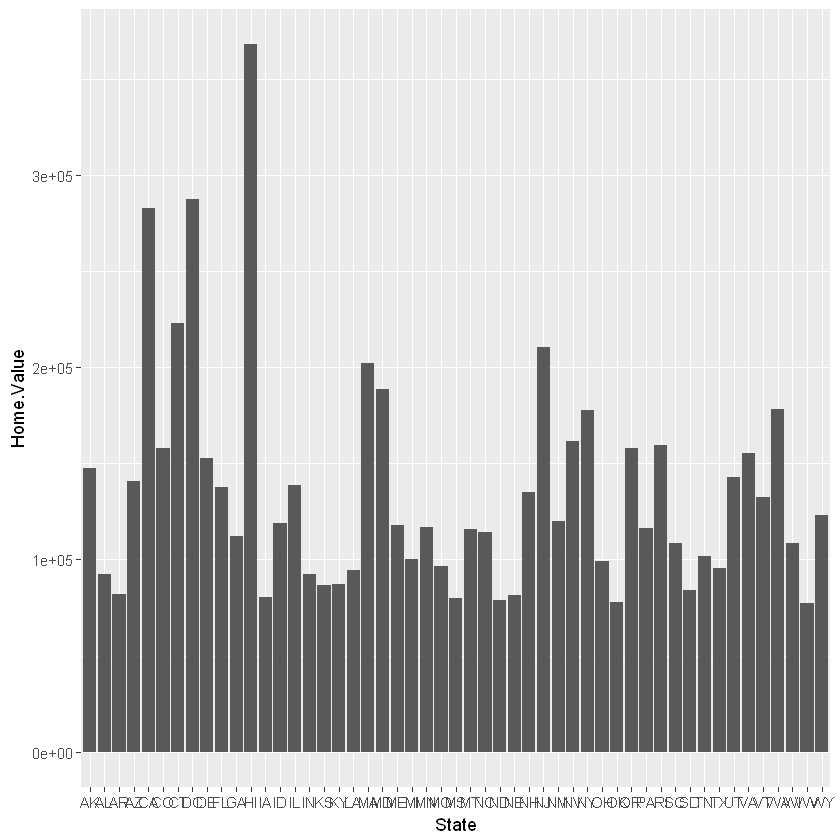

In [25]:
ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
  geom_bar(stat="identity")


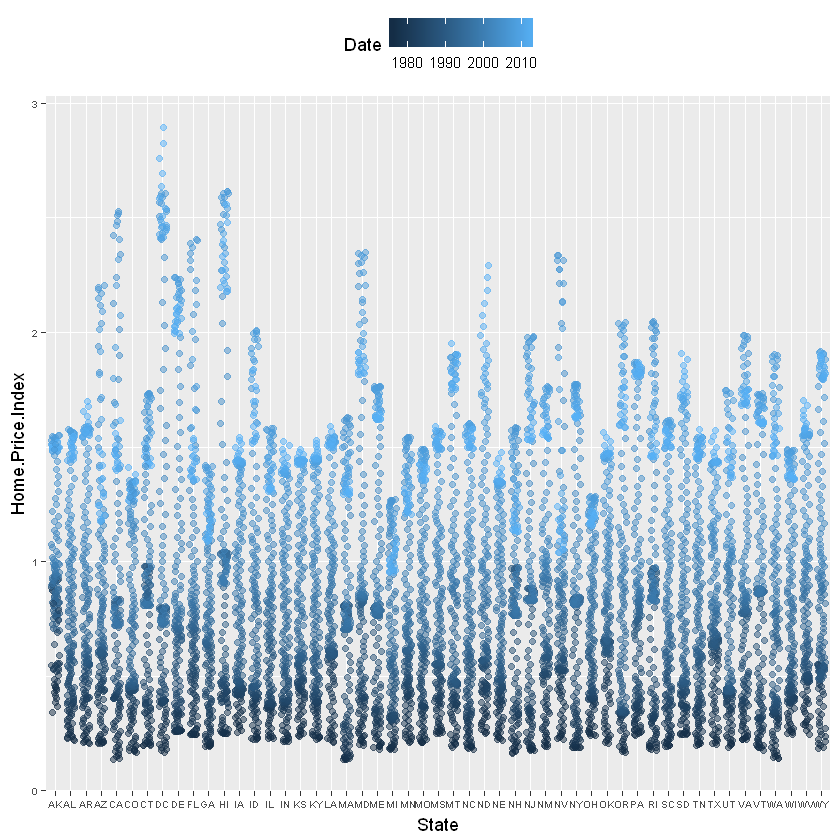

In [26]:
p3 <- ggplot(housing,
             aes(x = State,
                 y = Home.Price.Index)) + 
        theme(legend.position="top",
              axis.text=element_text(size = 6))
(p4 <- p3 + geom_point(aes(color = Date),
                       alpha = 0.5,
                       size = 1.5,
                       position = position_jitter(width = 0.25, height = 0)))

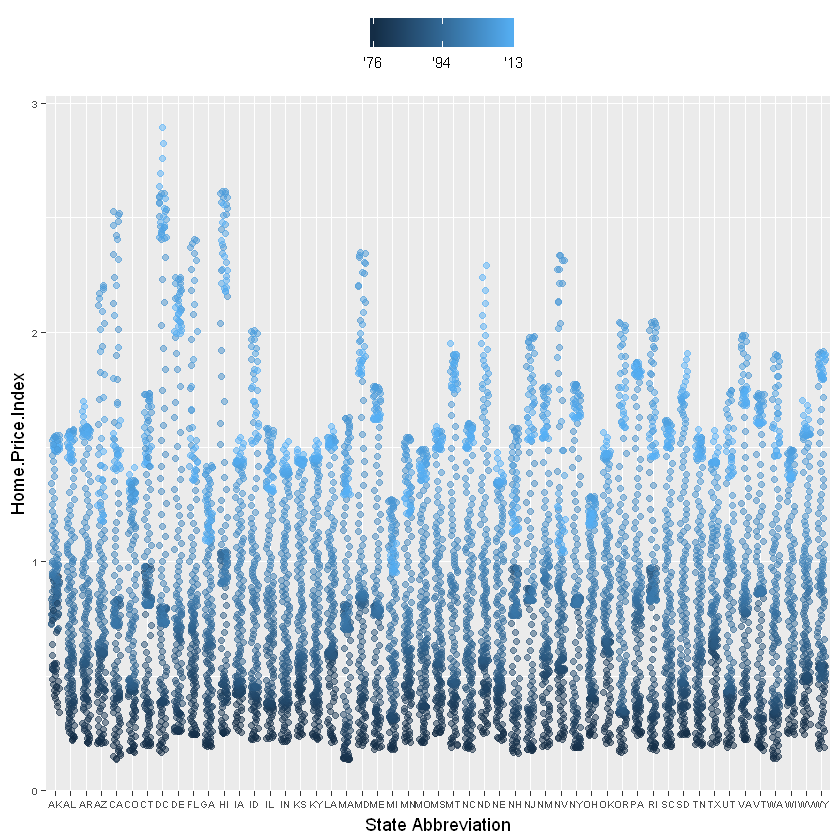

In [27]:
p4 + scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"))

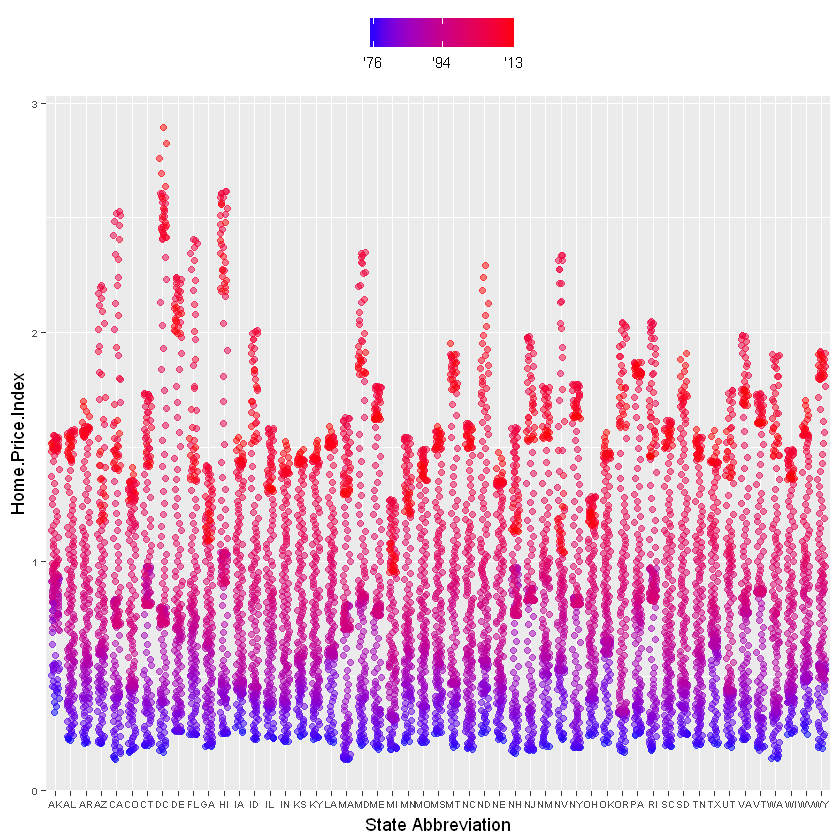

In [28]:
p4 +
  scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = "blue", high = "red")

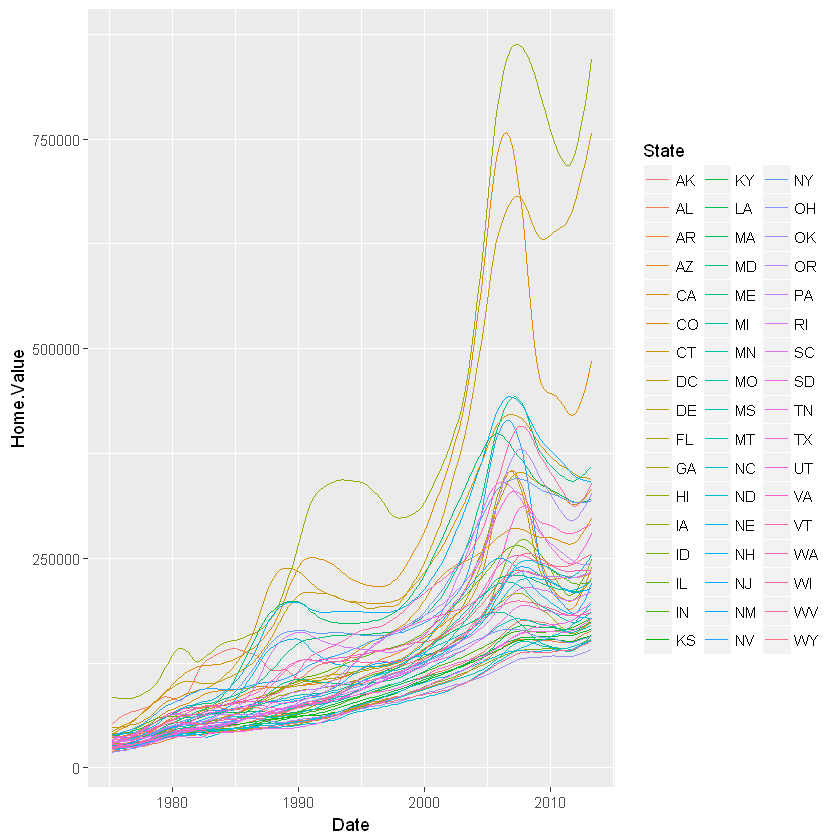

In [29]:
p5 <- ggplot(housing, aes(x = Date, y = Home.Value))
p5 + geom_line(aes(color = State))


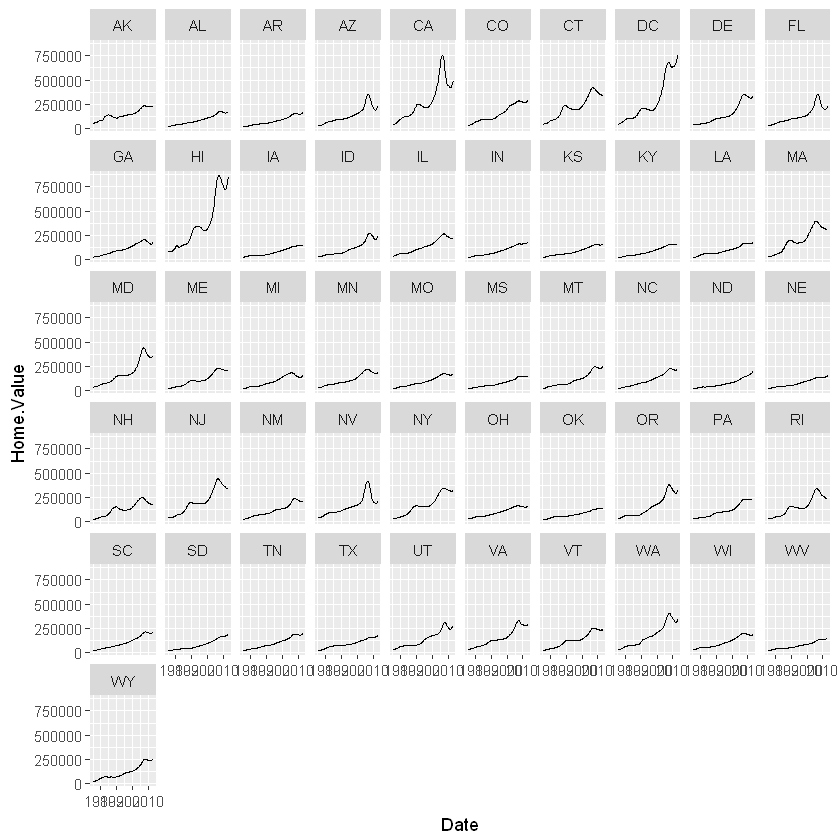

In [30]:
(p5 <- p5 + geom_line() +
   facet_wrap(~State, ncol = 10))


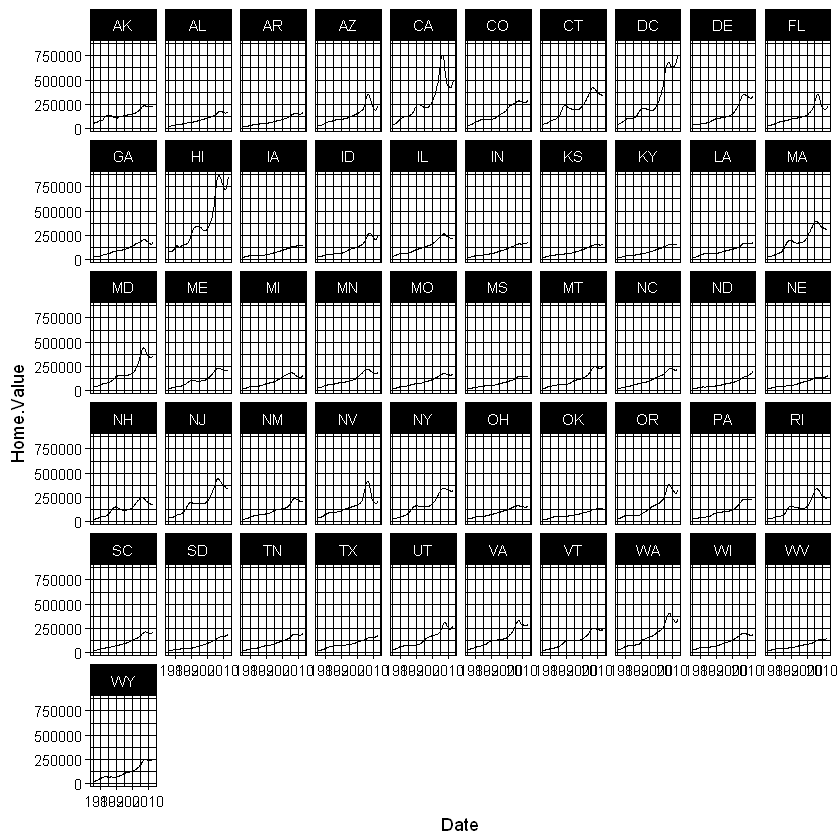

In [31]:
p5 + theme_linedraw()

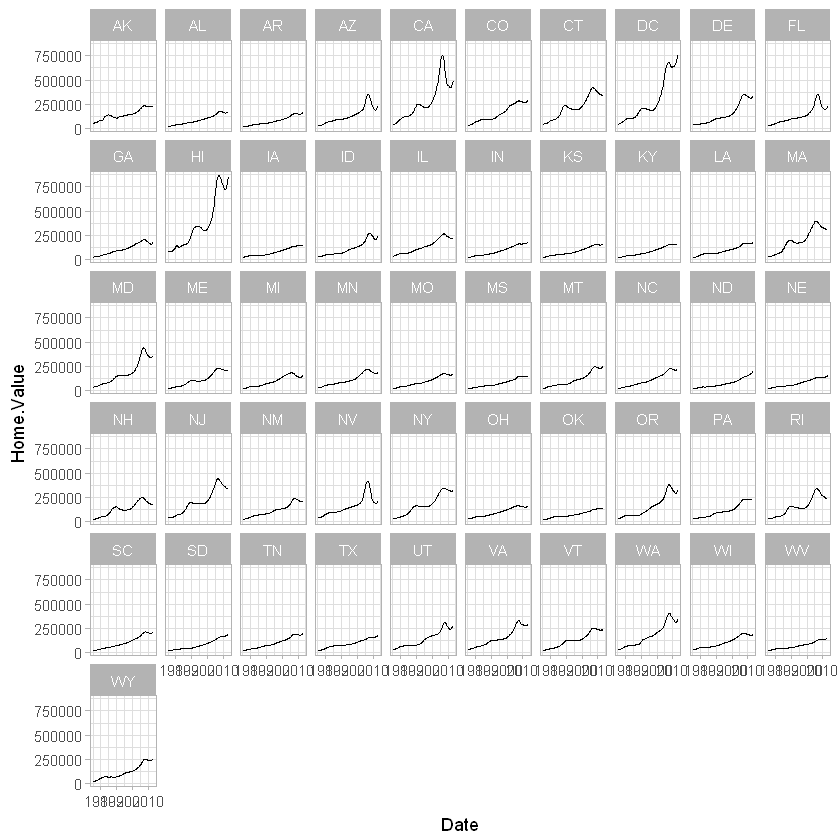

In [32]:
p5 + theme_light()

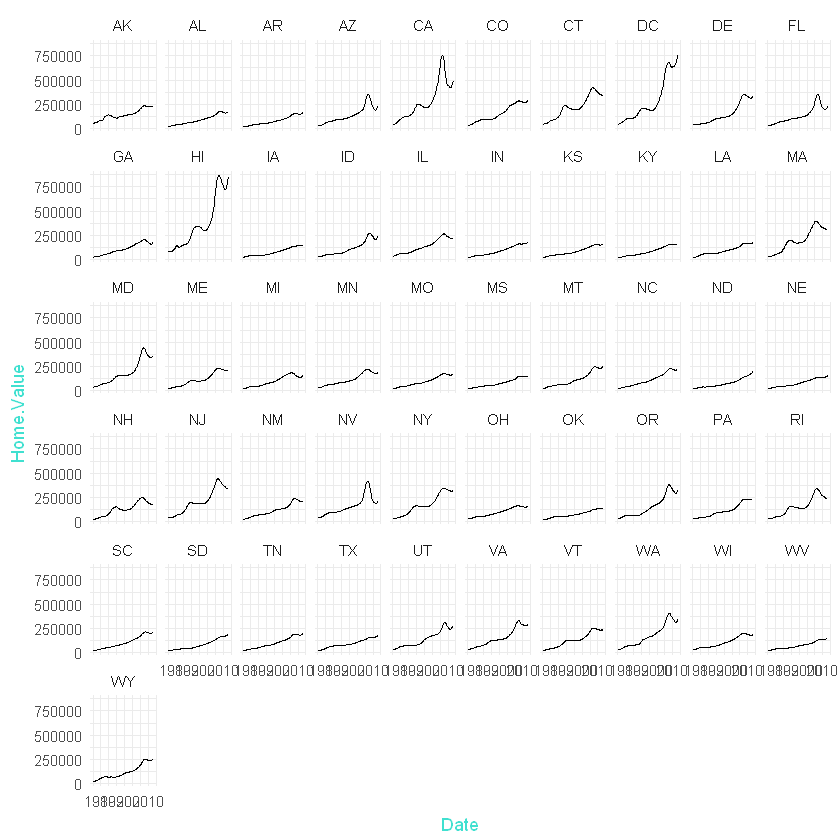

In [33]:
p5 + theme_minimal() +
  theme(text = element_text(color = "turquoise"))